# Exploratory Data Analysis (EDA)

- Perform univariate and bivariate analysis
- Visualize trends and patterns (line, histogram, scatter, etc.)
- Analyze correlations between different features
- Document findings and form hypotheses about the factors influencing betting outcomes



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# plt.style.use('ggplot')

## Load the Data

In [2]:
train = pd.read_csv("vct_data/train_preprocessed.csv")
test = pd.read_csv("vct_data/test_preprocessed.csv")

# Combine train and test data
vct_data = pd.concat([train, test], ignore_index=True)

## Dataset Overview

In [3]:
# Check first few rows
vct_data.head()

,Tournament,Stage,Match Type,Match Name,Map,Team A,Team A Score,Team A Attacker Score,Team A Defender Score,Team A Overtime Score,Team B,Team B Score,Team B Attacker Score,Team B Defender Score,Team B Overtime Score,Duration,Rating_TeamA,Average Combat Score_TeamA,Kills_TeamA,Deaths_TeamA,Assists_TeamA,Kills - Deaths (KD)_TeamA,"Kill, Assist, Trade, Survive %_TeamA",Average Damage Per Round_TeamA,Headshot %_TeamA,First Kills_TeamA,First Deaths_TeamA,Kills - Deaths (FKD)_TeamA,Rating_TeamB,Average Combat Score_TeamB,Kills_TeamB,Deaths_TeamB,Assists_TeamB,Kills - Deaths (KD)_TeamB,"Kill, Assist, Trade, Survive %_TeamB",Average Damage Per Round_TeamB,Headshot %_TeamB,First Kills_TeamB,First Deaths_TeamB,Kills - Deaths (FKD)_TeamB,Loadout Value_TeamA,Remaining Credits_TeamA,Type_TeamA,Loadout Value_TeamB,Remaining Credits_TeamB,Type_TeamB,2k_TeamA,3k_TeamA,4k_TeamA,5k_TeamA,1v1_TeamA,1v2_TeamA,1v3_TeamA,1v4_TeamA,1v5_TeamA,Econ_TeamA,Spike Plants_TeamA,Spike Defuses_TeamA,2k_TeamB,3k_TeamB,4k_TeamB,5k_TeamB,1v1_TeamB,1v2_TeamB,1v3_TeamB,1v4_TeamB,1v5_TeamB,Econ_TeamB,Spike Plants_TeamB,Spike Defuses_TeamB,Elimination_TeamA,Detonated_TeamA,Defused_TeamA,Time Expiry (No Plant)_TeamA,Eliminated_TeamA,Defused Failed_TeamA,Detonation Denied_TeamA,Time Expiry (Failed to Plant)_TeamA,Elimination_TeamB,Detonated_TeamB,Defused_TeamB,Time Expiry (No Plant)_TeamB,Eliminated_TeamB,Defused Failed_TeamB,Detonation Denied_TeamB,Time Expiry (Failed to Plant)_TeamB,KDA_TeamA,Rating_RollAvg_TeamA,Average Combat Score_RollAvg_TeamA,Average Damage Per Round_RollAvg_TeamA,KDA_RollAvg_TeamA,"Kill, Assist, Trade, Survive %_RollAvg_TeamA",Headshot %_RollAvg_TeamA,Econ_RollAvg_TeamA,KDA_TeamB,Rating_RollAvg_TeamB,Average Combat Score_RollAvg_TeamB,Average Damage Per Round_RollAvg_TeamB,KDA_RollAvg_TeamB,"Kill, Assist, Trade, Survive %_RollAvg_TeamB",Headshot %_RollAvg_TeamB,Econ_RollAvg_TeamB,Team A Map Win %,Team A H2H Win %,Team B Map Win %,Team B H2H Win %,Map_Abyss,Map_Ascent,Map_Bind,Map_Breeze,Map_Fracture,Map_Haven,Map_Icebox,Map_Lotus,Map_Pearl,Map_Split,Map_Sunset,Team A_Encoded,Team B_Encoded,Winner
0,Champions Tour LATAM Stage 1: Challengers 1,Open Qualifier: LAS,Round of 16,Leviatán vs Furious Gaming,Ascent,Leviatán,7,6,1,0,Furious Gaming,13,7,6,0,41.883333,1.042198,186.0,60,76,22,-16,0.722103,119.6,0.250,10,10,0,0.942223,218.4,76,60,25,16,0.680572,132.8,0.190,10,10,0,17800.025414,9073.021218,Full buy: 20k+,17237.886426,7888.274933,Full buy: 20k+,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.486853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.697865,0.0,0.0,2.0,1.0,3.0,1.0,9.0,0.0,3.0,1.0,9.0,0.0,3.0,1.0,2.0,1.0,3.0,1.0,1.078947,0.000000,0.0,0.0,0.000000,0.000000,0.000,0.000000,1.683333,0.000000,0.0,0.0,0.000000,0.000000,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.39737,0.467653,1
1,Champions Tour LATAM Stage 1: Challengers 1,Open Qualifier: LAS,Round of 16,Leviatán vs Furious Gaming,Bind,Leviatán,7,5,2,0,Furious Gaming,13,6,7,0,38.933333,1.042198,175.8,56,81,27,-25,0.722103,113.6,0.160,10,10,0,0.942223,228.8,81,56,35,25,0.680572,164.6,0.202,10,10,0,17800.025414,9073.021218,Full buy: 20k+,17237.886426,7888.274933,Full buy: 20k+,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.486853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.697865,0.0,0.0,4.0,3.0,0.0,0.0,8.0,0.0,5.0,0.0,8.0,0.0,5.0,0.0,4.0,3.0,0.0,0.0,1.024691,1.042198,186.0,119.6,1.078947,0.722103,0.250,55.486853,2.071429,0.942223,218.4,132.8,1.683333,0.680572,0.190,51.697865,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.39737,0.467653,1
2,Champions Tour LATAM Stage 1: Challengers 1,Open Qualifier: LAS,Round of 16,Procyon Team vs KRÜ Esports,Bind,Procyon Team,1,1,0,0,KRÜ Esports,13,2,11,0,28.033333,1.042198,187.2,40,67,21,-27,0.722103,130.8,0.192,6,8,-2,0.942223,253.0,67,40,23,27,0.680572,150.0,0.314,8,6,2,17800.025414,9073.021218,Full buy: 20k+,17237.886426,7888.274933,Full buy: 20k+,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.486853,0.0,0.0,0.0,0.0,0.0,0.0,

In [4]:
# View dataset shape
rows, cols = vct_data.shape

print(f"Rows: {rows}")
print(f"Columns: {cols}")

Rows: 25311
Columns: 120


In [5]:
# Show summary statistics
vct_data.describe()

,Team A Score,Team A Attacker Score,Team A Defender Score,Team A Overtime Score,Team B Score,Team B Attacker Score,Team B Defender Score,Team B Overtime Score,Duration,Rating_TeamA,Average Combat Score_TeamA,Kills_TeamA,Deaths_TeamA,Assists_TeamA,Kills - Deaths (KD)_TeamA,"Kill, Assist, Trade, Survive %_TeamA",Average Damage Per Round_TeamA,Headshot %_TeamA,First Kills_TeamA,First Deaths_TeamA,Kills - Deaths (FKD)_TeamA,Rating_TeamB,Average Combat Score_TeamB,Kills_TeamB,Deaths_TeamB,Assists_TeamB,Kills - Deaths (KD)_TeamB,"Kill, Assist, Trade, Survive %_TeamB",Average Damage Per Round_TeamB,Headshot %_TeamB,First Kills_TeamB,First Deaths_TeamB,Kills - Deaths (FKD)_TeamB,Loadout Value_TeamA,Remaining Credits_TeamA,Loadout Value_TeamB,Remaining Credits_TeamB,2k_TeamA,3k_TeamA,4k_TeamA,5k_TeamA,1v1_TeamA,1v2_TeamA,1v3_TeamA,1v4_TeamA,1v5_TeamA,Econ_TeamA,Spike Plants_TeamA,Spike Defuses_TeamA,2k_TeamB,3k_TeamB,4k_TeamB,5k_TeamB,1v1_TeamB,1v2_TeamB,1v3_TeamB,1v4_TeamB,1v5_TeamB,Econ_TeamB,Spike Plants_TeamB,Spike Defuses_TeamB,Elimination_TeamA,Detonated_TeamA,Defused_TeamA,Time Expiry (No Plant)_TeamA,Eliminated_TeamA,Defused Failed_TeamA,Detonation Denied_TeamA,Time Expiry (Failed to Plant)_TeamA,Elimination_TeamB,Detonated_TeamB,Defused_TeamB,Time Expiry (No Plant)_TeamB,Eliminated_TeamB,Defused Failed_TeamB,Detonation Denied_TeamB,Time Expiry (Failed to Plant)_TeamB,KDA_TeamA,Rating_RollAvg_TeamA,Average Combat Score_RollAvg_TeamA,Average Damage Per Round_RollAvg_TeamA,KDA_RollAvg_TeamA,"Kill, Assist, Trade, Survive %_RollAvg_TeamA",Headshot %_RollAvg_TeamA,Econ_RollAvg_TeamA,KDA_TeamB,Rating_RollAvg_TeamB,Average Combat Score_RollAvg_TeamB,Average Damage Per Round_RollAvg_TeamB,KDA_RollAvg_TeamB,"Kill, Assist, Trade, Survive %_RollAvg_TeamB",Headshot %_RollAvg_TeamB,Econ_RollAvg_TeamB,Team A Map Win %,Team A H2H Win %,Team B Map Win %,Team B H2H Win %,Map_Abyss,Map_Ascent,Map_Bind,Map_Breeze,Map_Fracture,Map_Haven,Map_Icebox,Map_Lotus,Map_Pearl,Map_Split,Map_Sunset,Team A_Encoded,Team B_Encoded,Winner
count,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000,25311.000000
mean,10.744301,6.422820,4.124254,0.184268,9.512781,3.776974,5.550512,0.173482,40.906937,1.041290,207.522764,73.815732,69.765003,27.296274,4.050729,0.722150,132.858864,0.244363,10.406977,9.720951,0.672000,0.943659,197.046014,69.786773,73.761053,25.613449,-3.974280,0.681597,126.456812,0.241701,9.741101,10.381929,-0.648572,17797.017358,9049.388563,17247.539016,7884.053698,10.205642,3.219312,0.663506,0.078148,0.771522,0.400695,0.105725,0.019043,0.002173,55.405687,5.358303,1.558413,9.442298,2.910395,0.598435,0.0

In [8]:
# Determine which columns have missing values
missing_values = vct_data.isnull().sum()

if missing_values.any():
    print("Columns with missing values:")
    print(missing_values[missing_values > 0])
else:
    print("No missing values found.")

No missing values found.


In [9]:
# Check for duplicates
duplicates = vct_data.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

Number of duplicates: 0


## Univariate Analysis

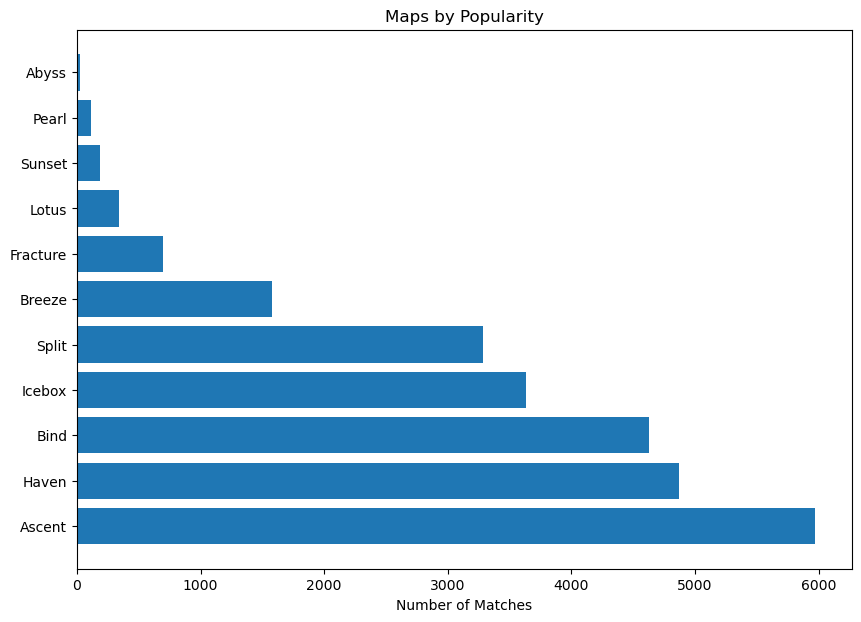

In [10]:
map_counts = vct_data['Map'].value_counts()

most_common_maps = map_counts.nlargest(11)

plt.figure(figsize=(10, 7))  
plt.barh(most_common_maps.index, most_common_maps.values)
plt.xlabel('Number of Matches') 
plt.title('Maps by Popularity')
plt.show()

The bar graph reveals that Ascent is the most popular map, followed by Haven, Bind, Icebox, and Split. These maps are preferred by players for their layouts. Conversely, Abyss is the least played, with Pearl, Sunset, Lotus, Fracture, and Breeze. This pattern suggests varying levels of player comfort and preference among the maps.


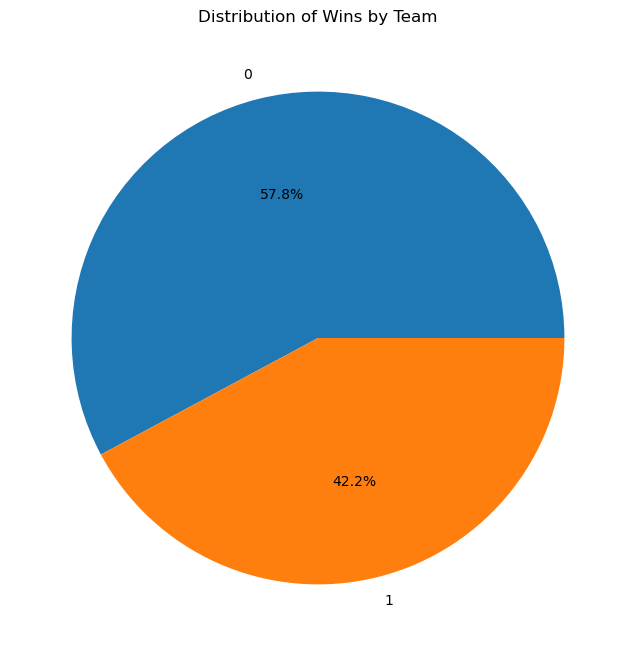

In [11]:
winner_counts = vct_data['Winner'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(winner_counts, labels=winner_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Wins by Team')
plt.show()

The pie chart illustrates the distribution of wins among the teams. This provides a clear comparison of their performance, where Team A shows a higher distribution of 57.8%.

## Bivariate Analysis

In [13]:
teamA = vct_data[['Team A', 'Kills_TeamA', 'Elimination_TeamA','Detonated_TeamA','Defused_TeamA','Time Expiry (Failed to Plant)_TeamA','Team A Attacker Score','Team A Defender Score','Average Combat Score_TeamA','Kill, Assist, Trade, Survive %_TeamA','Team A Clutch Win %','Headshot %_TeamA']].rename(columns={'Team A': 'Team', 'Kills_TeamA': 'Kills','Elimination_TeamA':'Elimination','Detonated_TeamA':'Detonated','Defused_TeamA':'Defused','Time Expiry (Failed to Plant)_TeamA':'Time Expiry','Team A Attacker Score':'Attacker Score','Team A Defender Score':'Defender Score','Average Combat Score_TeamA':'ACS','Kill, Assist, Trade, Survive %_TeamA':'KAST%','Team A Clutch Win %':'Clutch','Headshot %_TeamA':'Headshot%'})
teamB = vct_data[['Team B', 'Kills_TeamB', 'Elimination_TeamB','Detonated_TeamB','Defused_TeamB','Time Expiry (Failed to Plant)_TeamB','Team B Attacker Score','Team B Defender Score','Average Combat Score_TeamB','Kill, Assist, Trade, Survive %_TeamB','Team B Clutch Win %','Headshot %_TeamB']].rename(columns={'Team B': 'Team', 'Kills_TeamB': 'Kills','Elimination_TeamB':'Elimination','Detonated_TeamB':'Detonated','Defused_TeamB':'Defused','Time Expiry (Failed to Plant)_TeamB':'Time Expiry','Team B Attacker Score':'Attacker Score','Team B Defender Score':'Defender Score','Average Combat Score_TeamB':'ACS','Kill, Assist, Trade, Survive %_TeamB':'KAST%','Team B Clutch Win %':'Clutch','Headshot %_TeamB':'Headshot%'})
eda = pd.concat([teamA, teamB])

def plot_top_teams(data, column, title, xlabel):
    top_teams = data.groupby('Team')[column].mean().reset_index().sort_values(by=column, ascending=False).head(10)
    sns.barplot(x=column, y='Team', data=top_teams, palette='rocket', hue='Team', legend=False)
    plt.xlabel(xlabel)
    plt.ylabel('Team Name')
    plt.title(title)
    plt.show()

KeyError: "['Team A Clutch Win %'] not in index"

In [ ]:
plot_top_teams(eda, 'ACS', 'Top 10 Teams with Highest Average Combat Score', 'Average Combat Score')

These are the teams that has the highest average combat score. The graph implies the players' skills in terms of damage and kills, which is a crucial factor in determining the winner of a match. Although N4PAS takes the lead, the average scores of the teams are relatively close to each other, showing only minor differences in performance.

In [ ]:
plot_top_teams(eda, 'KAST%', 'Top 10 Teams with Highest Kills, Assist, Trade, and Survive Percentage', 'KAST Percentage')

These are the teams with the highest KAST percentages, showing consistency in their performances. They excel in getting kills, assists, surviving, and trading effectively. The team with highest percentage exceeding 80%, is The Reaper. The teams have percentages that are closely aligned, indicating similar levels of performance.

In [ ]:
plot_top_teams(eda, 'Headshot%', 'Top 10 Teams with Highest Headshot Percentage', 'Headshot Percentage')

These teams demonstrated precise aiming skills, achieving more headshots than their competitors. The percentage of 30%-50% reflects their exceptional accuracy and effectiveness in securing eliminations. For Fun takes the lead with above 40% headshot percentage.

In [ ]:
plot_top_teams(eda, 'Clutch', 'Top 10 Teams with Highest Clutch Win Percentage', 'Clutch Win Percentage')

These are the teams with the highest clutch win percentages, implying that they are great at winning tough rounds when the pressure is on. They show strong skills and teamwork, turning difficult situations into victories. Their ability to perform well in crucial moments is what helps them secure wins. Team Evo Seek has the highest clutch win percentage.

In [ ]:
plot_top_teams(eda, 'Elimination', 'Top 10 Teams with Highest Average Win by Elimination ', 'Average Win by Eilimination')

The graph reveals that the teams with the highest average wins by elimination all have scores above 10, demonstrating their strong elimination skills. Leading teams are Team Altitude and Rollo.

In [ ]:
plot_top_teams(eda, 'Defused', 'Top 10 Teams with Highest Average Win by Defusing Spike ', 'Average Win by Defusing Spike')

Another crucial skill that can influence match outcomes is the ability to defuse the spike. Teams demonstrating proficiency in this area are BrawlStars2005, leading with an impressive average of 6 wins per map, game, and match.

In [ ]:
plot_top_teams(eda, 'Detonated', 'Top 10 Teams with Highest Average Win by Detonation ', 'Average Win by Detonation')

The graph indicates that these teams experienced the highest frequency of wins in detonating the spike. Hit Gaming Plan leads with a score of 3.5. The following teams' scores ranges from an average of 2 to 3 wins per map, game, and match.

In [ ]:
plot_top_teams(eda, 'Time Expiry', 'Top 10 Teams with Highest Average Loss by Failing to Plant ', 'Average Loss by Failing to Plant')

The graph suggests that these teams had the most frequent issues with spike planting, leading to higher losses. QWERTZ leads with a score of 2.5, and the following teams scored an average of 2 losses per map, game, and match.

In [ ]:
plot_top_teams(eda, 'Attacker Score', 'Top 10 Teams with Highest Average Attacker Score', 'Average Attacker Score')

The bar graph showcases the teams with the highest average attacker scores, reflecting their skills in attacking strategies. The leading teams have achieved average scores between 8 and 10 per map, game, and match, showing their effectiveness in gameplay.

In [ ]:
plot_top_teams(eda, 'Defender Score', 'Top 10 Teams with Highest Average Defender Score', 'Average Defender Score')

The bar graph illustrates the teams with the highest average defender scores, highlighting their effectiveness in defensive play and overall survivability. N4Pas is leading with Team Onyx.

### Performance Metrics


In [ ]:
plt.scatter(vct_data["Rating_TeamA"], vct_data["Rating_TeamB" ])

plt.xlabel("Team A Rating")
plt.ylabel("Team B Rating")
plt.title("Team A vs Team B Rating") 

plt.show()

In [ ]:
plt.scatter(vct_data["Rating_TeamB"], vct_data["Rating_TeamA" ])
plt.xlabel("Team B Rating")
plt.ylabel("Team A Rating")
plt.title("Team A vs Team B Rating")
plt.show()

In [ ]:
plt.scatter(vct_data["Average Combat Score_TeamA"], vct_data["Average Combat Score_TeamB" ])
plt.xlabel("Team A Average Combat Score")
plt.ylabel("Team B Average Combat Score")
plt.title("Team A vs Team B Average Combat Score")
plt.show()

In [ ]:
plt.scatter(vct_data["Average Combat Score_TeamB"], vct_data["Average Combat Score_TeamA" ])
plt.xlabel("Team B Average Combat Score")
plt.ylabel("Team A Average Combat Score")
plt.title("Team A vs Team B Average Combat Score")
plt.show()

In [ ]:
plt.scatter(vct_data["Kills_TeamA"], vct_data["Kills_TeamB" ])
plt.xlabel("Team A Kills")
plt.ylabel("Team B Kills")
plt.title("Team A vs Team B Kills")
plt.show()

In [ ]:
plt.scatter(vct_data["Kills_TeamB"], vct_data["Kills_TeamA" ])
plt.xlabel("Team B Kills")
plt.ylabel("Team A Kills")
plt.title("Team A vs Team B Kills")
plt.show()

In [ ]:
plt.scatter(vct_data["Deaths_TeamA"], vct_data["Deaths_TeamB" ])
plt.xlabel("Team A Deaths")
plt.ylabel("Team B Deaths")
plt.title("Team A vs Team B Deaths")
plt.show()

In [ ]:
plt.scatter(vct_data["Deaths_TeamB"], vct_data["Deaths_TeamA" ])
plt.xlabel("Team B Deaths")
plt.ylabel("Team A Deaths")
plt.title("Team A vs Team B Deaths")
plt.show()

In [ ]:
# Selecting the relevant columns from your DataFrame
cols_to_plot = ["Rating_TeamA","Rating_TeamB","Average Combat Score_TeamA","Average Combat Score_TeamB", "Kills_TeamA", "Kills_TeamB", 
                "Deaths_TeamA", "Deaths_TeamB", "Assists_TeamA", "Assists_TeamB", "Kill, Assist, Trade, Survive %_TeamA", 
                "Kill, Assist, Trade, Survive %_TeamB"]
selected = vct_data[cols_to_plot]

# Calculate the correlation matrix for the selected columns
corr_matrix = selected.corr()

# Plot the heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the heatmap
plt.show()

### Economy and Strategy

In [ ]:
plt.scatter(vct_data["Loadout Value_TeamA"], vct_data["Loadout Value_TeamB" ])
plt.xlabel("Team A Loadout Value")
plt.ylabel("Team B Loadout Value")
plt.title("Team A vs Team B Loadout Value")
plt.show()

In [ ]:
plt.scatter(vct_data["Loadout Value_TeamB"], vct_data["Loadout Value_TeamA" ])
plt.xlabel("Team B Loadout Value")
plt.ylabel("Team A Loadout Value")
plt.title("Team A vs Team B Loadout Value")
plt.show()

In [ ]:
plt.scatter(vct_data["Remaining Credits_TeamA"], vct_data["Remaining Credits_TeamB" ])
plt.xlabel("Team A Remaining Credits")
plt.ylabel("Team B Remaining Credits")
plt.title("Team A vs Team B Remaining Credits")
plt.show()

In [ ]:
plt.scatter(vct_data["Remaining Credits_TeamB"], vct_data["Remaining Credits_TeamA" ])
plt.xlabel("Team B Remaining Credits")
plt.ylabel("Team A Remaining Credits")
plt.title("Team A vs Team B Remaining Credits")
plt.show()

In [ ]:
plt.scatter(vct_data["Econ_TeamA"], vct_data["Econ_TeamB" ])
plt.xlabel("Team A Econ")
plt.ylabel("Team B Econ")
plt.title("Team A vs Team B Econ")
plt.show()

In [ ]:
plt.scatter(vct_data["Econ_TeamB"], vct_data["Econ_TeamA" ])
plt.xlabel("Team B Econ")
plt.ylabel("Team A Econ")
plt.title("Team A vs Team B Econ")
plt.show()

In [ ]:
plt.scatter(vct_data["Loadout Value_TeamA"], vct_data["Loadout Value_TeamB" ])
plt.xlabel("Team A Loadout Value")
plt.ylabel("Team B Loadout Value")
plt.title("Team A vs Team B Loadout Value")
plt.show()

In [ ]:
plt.scatter(vct_data["Loadout Value_TeamB"], vct_data["Loadout Value_TeamA" ])
plt.xlabel("Team B Loadout Value")
plt.ylabel("Team A Loadout Value")
plt.title("Team A vs Team B Loadout Value")
plt.show()

### Map and Side Performance


In [ ]:
# Define the list of maps
maps = ["Ascent", "Haven", "Bind", "Icebox", "Split", "Breeze", "Fracture", "Lotus", "Sunset", "Pearl", "Abyss"]

# Create a figure
plt.figure(figsize=(14, 8))

# Prepare colors for Team A (Attacker) and Team B (Defender)
colors = ['#1f77b4', '#ff7f0e']  # Blue for Team A, Orange for Team B

# Prepare data for each map
data = []
for map_name in maps:
    team_a_attacker_scores = vct_data[vct_data["Map"] == map_name]["Team A Attacker Score"]
    team_b_defender_scores = vct_data[vct_data["Map"] == map_name]["Team B Defender Score"]
    # Append scores as a pair for each map
    data.append([team_a_attacker_scores, team_b_defender_scores])

# Create a grouped violin plot for each map
for i, (team_a, team_b) in enumerate(data):
    positions = [2 * i + 1, 2 * i + 2]  # Positions to plot Team A and Team B side by side
    parts = plt.violinplot([team_a, team_b], positions=positions, showmeans=False, showmedians=True)

    # Set different colors for Team A and Team B violins
    for j, pc in enumerate(parts['bodies']):
        if j % 2 == 0:
            pc.set_facecolor(colors[0])  # Color for Team A (Attacker)
        else:
            pc.set_facecolor(colors[1])  # Color for Team B (Defender)
        pc.set_edgecolor('black')  # Add black border for clarity
        pc.set_alpha(0.8)  # Make the violins slightly transparent

# Set x-ticks and labels
positions = [2 * i + 1.5 for i in range(len(maps))]  # Midpoints for the x-ticks
labels = [f"{map_name}" for map_name in maps]  # Map names as labels
plt.xticks(positions, labels, rotation=90)

# Add a legend to distinguish teams
plt.legend(['Team A Attacker', 'Team B Defender'], loc='upper right')

# Set axis labels and title
plt.ylabel("Score")
plt.title("Team A Attacker vs Team B Defender Score by Map")

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Define the list of maps
maps = ["Ascent", "Haven", "Bind", "Icebox", "Split", "Breeze", "Fracture", "Lotus", "Sunset", "Pearl", "Abyss"]

# Create a figure
plt.figure(figsize=(14, 8))

# Prepare colors for Team A (Attacker) and Team B (Defender)
colors = ['#1f77b4', '#ff7f0e']  # Blue for Team A, Orange for Team B

# Prepare data for each map
data = []
for map_name in maps:
    team_b_attacker_scores = vct_data[vct_data["Map"] == map_name]["Team B Attacker Score"]
    team_a_defender_scores = vct_data[vct_data["Map"] == map_name]["Team A Defender Score"]
    # Append scores as a pair for each map
    data.append([team_b_attacker_scores, team_a_defender_scores])

# Create a grouped violin plot for each map
for i, (team_b, team_a) in enumerate(data):
    positions = [2 * i + 1, 2 * i + 2]  # Positions to plot Team A and Team B side by side
    parts = plt.violinplot([team_b, team_a], positions=positions, showmeans=False, showmedians=True)

    # Set different colors for Team A and Team B violins
    for j, pc in enumerate(parts['bodies']):
        if j % 2 == 0:
            pc.set_facecolor(colors[0])  # Color for Team B (Attacker)
        else:
            pc.set_facecolor(colors[1])  # Color for Team A (Defender)
        pc.set_edgecolor('black')  # Add black border for clarity
        pc.set_alpha(0.8)  # Make the violins slightly transparent

# Set x-ticks and labels
positions = [2 * i + 1.5 for i in range(len(maps))]  # Midpoints for the x-ticks
labels = [f"{map_name}" for map_name in maps]  # Map names as labels
plt.xticks(positions, labels, rotation=90)

# Add a legend to distinguish teams
plt.legend(['Team B Attacker', 'Team A Defender'], loc='upper right')

# Set axis labels and title
plt.ylabel("Score")
plt.title("Team B Attacker vs Team A Defender Score by Map")

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
plt.scatter(vct_data["Team A Attacker Score"], vct_data["Team B Defender Score" ])
plt.xlabel("Team A Attacker Score")
plt.ylabel("Team B Defender Score")
plt.title("Team A vs Team B Loadout Value")
plt.show()

### Clutch Situation and Multi-Kills

In [ ]:
sum_teamA = vct_data[["1v1_TeamA", "1v2_TeamA", "1v3_TeamA", "1v4_TeamA", "1v5_TeamA"]].sum(axis=1)
sum_teamB = vct_data[["1v1_TeamB", "1v2_TeamB", "1v3_TeamB", "1v4_TeamB", "1v5_TeamB"]].sum(axis=1)

plt.scatter(sum_teamA, sum_teamB)
plt.xlabel("Team A Clutch Situations")
plt.ylabel("Team B Clutch Situations")
plt.title("Team A vs Team B Clutch Situations")
plt.show()



In [ ]:
sum_teamA = vct_data[["2k_TeamA", "3k_TeamA", "4k_TeamA", "5k_TeamA"]].sum(axis=1)
sum_teamB = vct_data[["2k_TeamA", "3k_TeamA", "4k_TeamA", "5k_TeamA"]].sum(axis=1)

plt.scatter(sum_teamA, sum_teamB)
plt.xlabel("Team A Kills")
plt.ylabel("Team B Kills")
plt.title("Team A vs Team B Kills")
plt.show()


### First Blood and KAST

In [ ]:
plt.scatter(vct_data["First Kills_TeamA"], vct_data["First Deaths_TeamB" ])
plt.xlabel("Team A First Kills")
plt.ylabel("Team B First Deaths")
plt.title("Team A First Kills vs Team B First Deaths")
plt.show()

In [ ]:
plt.scatter(vct_data["First Kills_TeamB"], vct_data["First Deaths_TeamA" ])
plt.xlabel("Team B First Kills")
plt.ylabel("Team A First Deaths")
plt.title("Team B First Kills vs Team A First Deaths")
plt.show()

In [ ]:
plt.scatter(vct_data["Kill, Assist, Trade, Survive %_TeamA" ], vct_data["Kill, Assist, Trade, Survive %_TeamB"])
plt.xlabel("Team A Kills, Assist, Trade, Survive %")
plt.ylabel("Team B Kills, Assist, Trade, Survive %")
plt.title("Team A vs Team B Kills, Assist, Trade, Survive %")
plt.show()

In [ ]:
plt.scatter(vct_data["Kill, Assist, Trade, Survive %_TeamB" ], vct_data["Kill, Assist, Trade, Survive %_TeamA"])
plt.xlabel("Team B Kills, Assist, Trade, Survive %")
plt.ylabel("Team A Kills, Assist, Trade, Survive %")
plt.title("Team A vs Team B Kills, Assist, Trade, Survive %")
plt.show()

### Round Outcomes

In [ ]:
data = [
    "Elimination_TeamA",
    "Detonated_TeamA",
    "Defused_TeamA",
    "Time Expiry (No Plant)_TeamA",
    "Eliminated_TeamA",
    "Defused Failed_TeamA",
    "Detonation Denied_TeamA",
    "Time Expiry (Failed to Plant)_TeamA",
    "Elimination_TeamB",
    "Detonated_TeamB",
    "Defused_TeamB",
    "Time Expiry (No Plant)_TeamB",
    "Eliminated_TeamB",
    "Defused Failed_TeamB",
    "Detonation Denied_TeamB",
    "Time Expiry (Failed to Plant)_TeamB"
]

# Select relevant columns from the dataframe
df = vct_data[data]

# Summarize data for Team A and Team B
teamA_columns = [
    "Elimination_TeamA",
    "Detonated_TeamA",
    "Defused_TeamA",
    "Time Expiry (No Plant)_TeamA",
    "Eliminated_TeamA",
    "Defused Failed_TeamA",
    "Detonation Denied_TeamA",
    "Time Expiry (Failed to Plant)_TeamA"
]

teamB_columns = [
    "Elimination_TeamB",
    "Detonated_TeamB",
    "Defused_TeamB",
    "Time Expiry (No Plant)_TeamB",
    "Eliminated_TeamB",
    "Defused Failed_TeamB",
    "Detonation Denied_TeamB",
    "Time Expiry (Failed to Plant)_TeamB"
]

# Aggregate data for each team
teamA_data = df[teamA_columns].sum()
teamB_data = df[teamB_columns].sum()

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Team A': teamA_data,
    'Team B': teamB_data
}).T

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

plot_data.plot(kind='bar', stacked=True, ax=ax)

# Add labels and title
ax.set_xlabel('Team')
ax.set_ylabel('Counts')
ax.set_title('Comparison of Round Outcomes for Team A and Team B')
ax.legend(title='Team')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


### Map Win Percentages and Head-to-Head

In [ ]:
plt.scatter(vct_data["Team A Map Win %" ], vct_data["Team B Map Win %"])
plt.xlabel("Team A Map Win %")
plt.ylabel("Team B Map Win %")
plt.title("Team A vs Team B Map Win %")
plt.show()

In [ ]:
plt.scatter(vct_data["Team B Map Win %" ], vct_data["Team A Map Win %"])
plt.xlabel("Team B Map Win %")
plt.ylabel("Team A Map Win %")
plt.title("Team A vs Team B Map Win %")
plt.show()

### Score Differential


In [ ]:
plt.scatter(vct_data["Score Diff" ], vct_data["ACS Diff"])
plt.xlabel("Score Diff")
plt.ylabel("ACS Diff")
plt.title("Score Diff vs ACS Diff")
plt.show()

In [ ]:
plt.scatter(vct_data["ACS Diff" ], vct_data["Score Diff"])
plt.xlabel("ACS Diff")
plt.ylabel("Score  Diff")
plt.title("Score Diff vs ACS Diff")
plt.show()

In [ ]:
plt.scatter(vct_data["Score Diff" ], vct_data["KAST Diff"])
plt.xlabel("Score Diff")
plt.ylabel("KAST Diff")
plt.title("Score Diff vs KAST Diff")
plt.show()

In [ ]:
plt.scatter(vct_data["KAST Diff" ], vct_data["Score Diff"])
plt.xlabel("KAST Diff")
plt.ylabel("Score Diff")
plt.title("Score Diff vs KAST Diff")
plt.show()

In [ ]:
plt.scatter(vct_data["Score Diff" ], vct_data["ADR Diff"])
plt.xlabel("Score Diff")
plt.ylabel("ADR Diff")
plt.title("Score Diff vs ADR Diff")
plt.show()

In [ ]:
plt.scatter(vct_data["ADR Diff" ], vct_data["Score Diff"])
plt.xlabel("ADR Diff")
plt.ylabel("Score Diff")
plt.title("Score Diff vs ADR Diff")
plt.show()

In [ ]:
# Selecting the relevant columns from your DataFrame
cols_to_plot = ["Score Diff","ACS Diff","KAST Diff","ADR Diff"]
selected = vct_data[cols_to_plot]

# Calculate the correlation matrix for the selected columns
corr_matrix = selected.corr()

# Plot the heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the heatmap
plt.show()

### KDA and Clutch Win Percentage

In [ ]:
plt.scatter(vct_data["Team A KDA"], vct_data["Team B KDA" ])

plt.xlabel("Team A KDA")
plt.ylabel("Team B KDA")
plt.title("Team A vs Team B KDA") 

plt.show()

In [ ]:
plt.scatter(vct_data["Team B KDA"], vct_data["Team A KDA" ])

plt.xlabel("Team B KDA")
plt.ylabel("Team A KDA")
plt.title("Team A vs Team B KDA") 

plt.show()

In [ ]:
plt.scatter(vct_data["Team A Clutch Win %"], vct_data["Team B Clutch Win %" ])

plt.xlabel("Team A Clutch Win %")
plt.ylabel("Team B Clutch Win %")
plt.title("Team A vs Team B Clutch Win %") 

plt.show()



In [ ]:
plt.scatter(vct_data["Team B Clutch Win %"], vct_data["Team A Clutch Win %" ])

plt.xlabel("Team B Clutch Win %")
plt.ylabel("Team A Clutch Win %")
plt.title("Team A vs Team B Clutch Win %") 

plt.show()


### Duration Analysis

In [ ]:
plt.scatter(vct_data["Duration"], vct_data["Score Diff" ])

plt.xlabel("Duration")
plt.ylabel("Score Diff")
plt.title("Duration vs Score Diff") 

plt.show()


In [ ]:
plt.scatter(vct_data["Score Diff"], vct_data["Duration" ])

plt.xlabel("Score Diff")
plt.ylabel("Duration")
plt.title("Duration vs Score Diff") 

plt.show()


In [ ]:
plt.scatter(vct_data["Duration"], vct_data["Kills_TeamA" ])

plt.xlabel("Duration")
plt.ylabel("Team A Kills")
plt.title("Duration vs Team A Kills") 
plt.show()


In [ ]:
plt.scatter(vct_data["Kills_TeamA"], vct_data["Duration" ])

plt.xlabel("Team A Kills")
plt.ylabel("Duration")
plt.title("Duration vs Team A Kills") 
plt.show()

In [ ]:
plt.scatter(vct_data["Duration"], vct_data["Kills_TeamB" ])

plt.xlabel("Duration")
plt.ylabel("Team B Kills")
plt.title("Duration vs Team B Kills") 
plt.show()


In [ ]:
plt.scatter(vct_data["Kills_TeamB"], vct_data["Duration" ])

plt.xlabel("Team B Kills")
plt.ylabel("Duration")
plt.title("Duration vs Team B Kills") 
plt.show()